Based on: https://blog.dask.org/2018/02/09/credit-models-with-dask

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [1]:
hist_yrs = range(10)
incomes = range(10)

In [2]:
def default(hist, income):
    return (hist + 1) ** 2 + (income / 2)

In [3]:
from dask import delayed

@delayed
def increment(x):
    return x + 1

@delayed
def halve(y):
    return y / 2

@delayed
def default(hist, income):
    return hist**2 + income

In [4]:
inc_hist = [increment(n) for n in hist_yrs]
inc_hist

[Delayed('increment-7e1918c2-e253-4da4-894c-2ac1cdea6481'),
 Delayed('increment-5e58655d-063a-4123-8e19-ae9a64f298d5'),
 Delayed('increment-b7244e6d-b47f-435b-8701-1f830dfb7fdb'),
 Delayed('increment-dbb98bd2-01da-411c-a2f5-23b57291c156'),
 Delayed('increment-75b1bdd7-16dd-4b50-b981-00bfa40b9b4c'),
 Delayed('increment-c3874f89-205e-4e0a-ae63-248d0e39454d'),
 Delayed('increment-b95daf6a-b1a6-4582-ae92-515cf8e5cdfe'),
 Delayed('increment-91c05da6-c80d-4ddd-a0d7-e43cb23e38c1'),
 Delayed('increment-26497cff-134d-45ef-bde1-b36634f88b91'),
 Delayed('increment-48b75e5c-d65d-40a7-b4a3-ba037dfef149')]

In [5]:
halved_income = [halve(n) for n in incomes]
halved_income

[Delayed('halve-825ac69c-d425-4821-b44d-8f868742bfa6'),
 Delayed('halve-f9b1b821-fe48-48d1-8706-0a77e606b7a8'),
 Delayed('halve-653b8de9-5062-4ff9-9e5a-3a17d7bd9741'),
 Delayed('halve-7042b9d0-21bf-4c67-895a-34b27f0932c2'),
 Delayed('halve-30c76494-98a3-45cf-8a18-828ea4fda7ba'),
 Delayed('halve-9c6ea386-0645-479a-ac68-c5acff1c5fa0'),
 Delayed('halve-acf47964-77bd-45ef-87e2-b2fd8bc0347b'),
 Delayed('halve-bd34146e-0a93-4924-9737-e82015a437b1'),
 Delayed('halve-7b9cd946-fb8d-4826-bc8c-e94b183426ac'),
 Delayed('halve-24c9cf8b-b766-4c69-b7ee-c74803614dc2')]

In [6]:
estimated_default = [default(hist, income) for hist, income in zip(inc_hist, halved_income)]
estimated_default

[Delayed('default-afe00c93-ad64-4a9c-aedc-a40996659f2b'),
 Delayed('default-336c426d-1b64-4f90-b362-3b0fd8c590b6'),
 Delayed('default-8fae853b-50a4-4e24-babf-c23dede73cad'),
 Delayed('default-330b8dbf-f4fb-41be-9e1f-3334a01a5469'),
 Delayed('default-645a93c8-a020-4276-9454-4e47ac4c9491'),
 Delayed('default-f6896269-dc06-4c98-8246-0b24d96f8ab1'),
 Delayed('default-fdd81a36-759d-4eb8-8b11-17443070f264'),
 Delayed('default-1b731606-037d-4959-8298-ffb0cd1c8404'),
 Delayed('default-b6f7d005-621a-4357-a14f-7954407bb3f6'),
 Delayed('default-465b507d-99d1-4a90-b9ef-b5b825ecc387')]

In [7]:
@delayed
def agg(x, y):
    return x + y

def merge(seq):
    if len(seq) < 2:
        return seq
    middle = len(seq)//2
    left = merge(seq[:middle])
    right = merge(seq[middle:])
    if not right:
        return left
    return [agg(left[0], right[0])]

default_sum = merge(estimated_default)

In [8]:
default_sum

[Delayed('agg-66c27c1b-0144-4aa9-96fd-8fc5db2fc075')]

In [9]:
avg_default = default_sum[0] / 10
avg_default.compute()  # 40.75

40.75

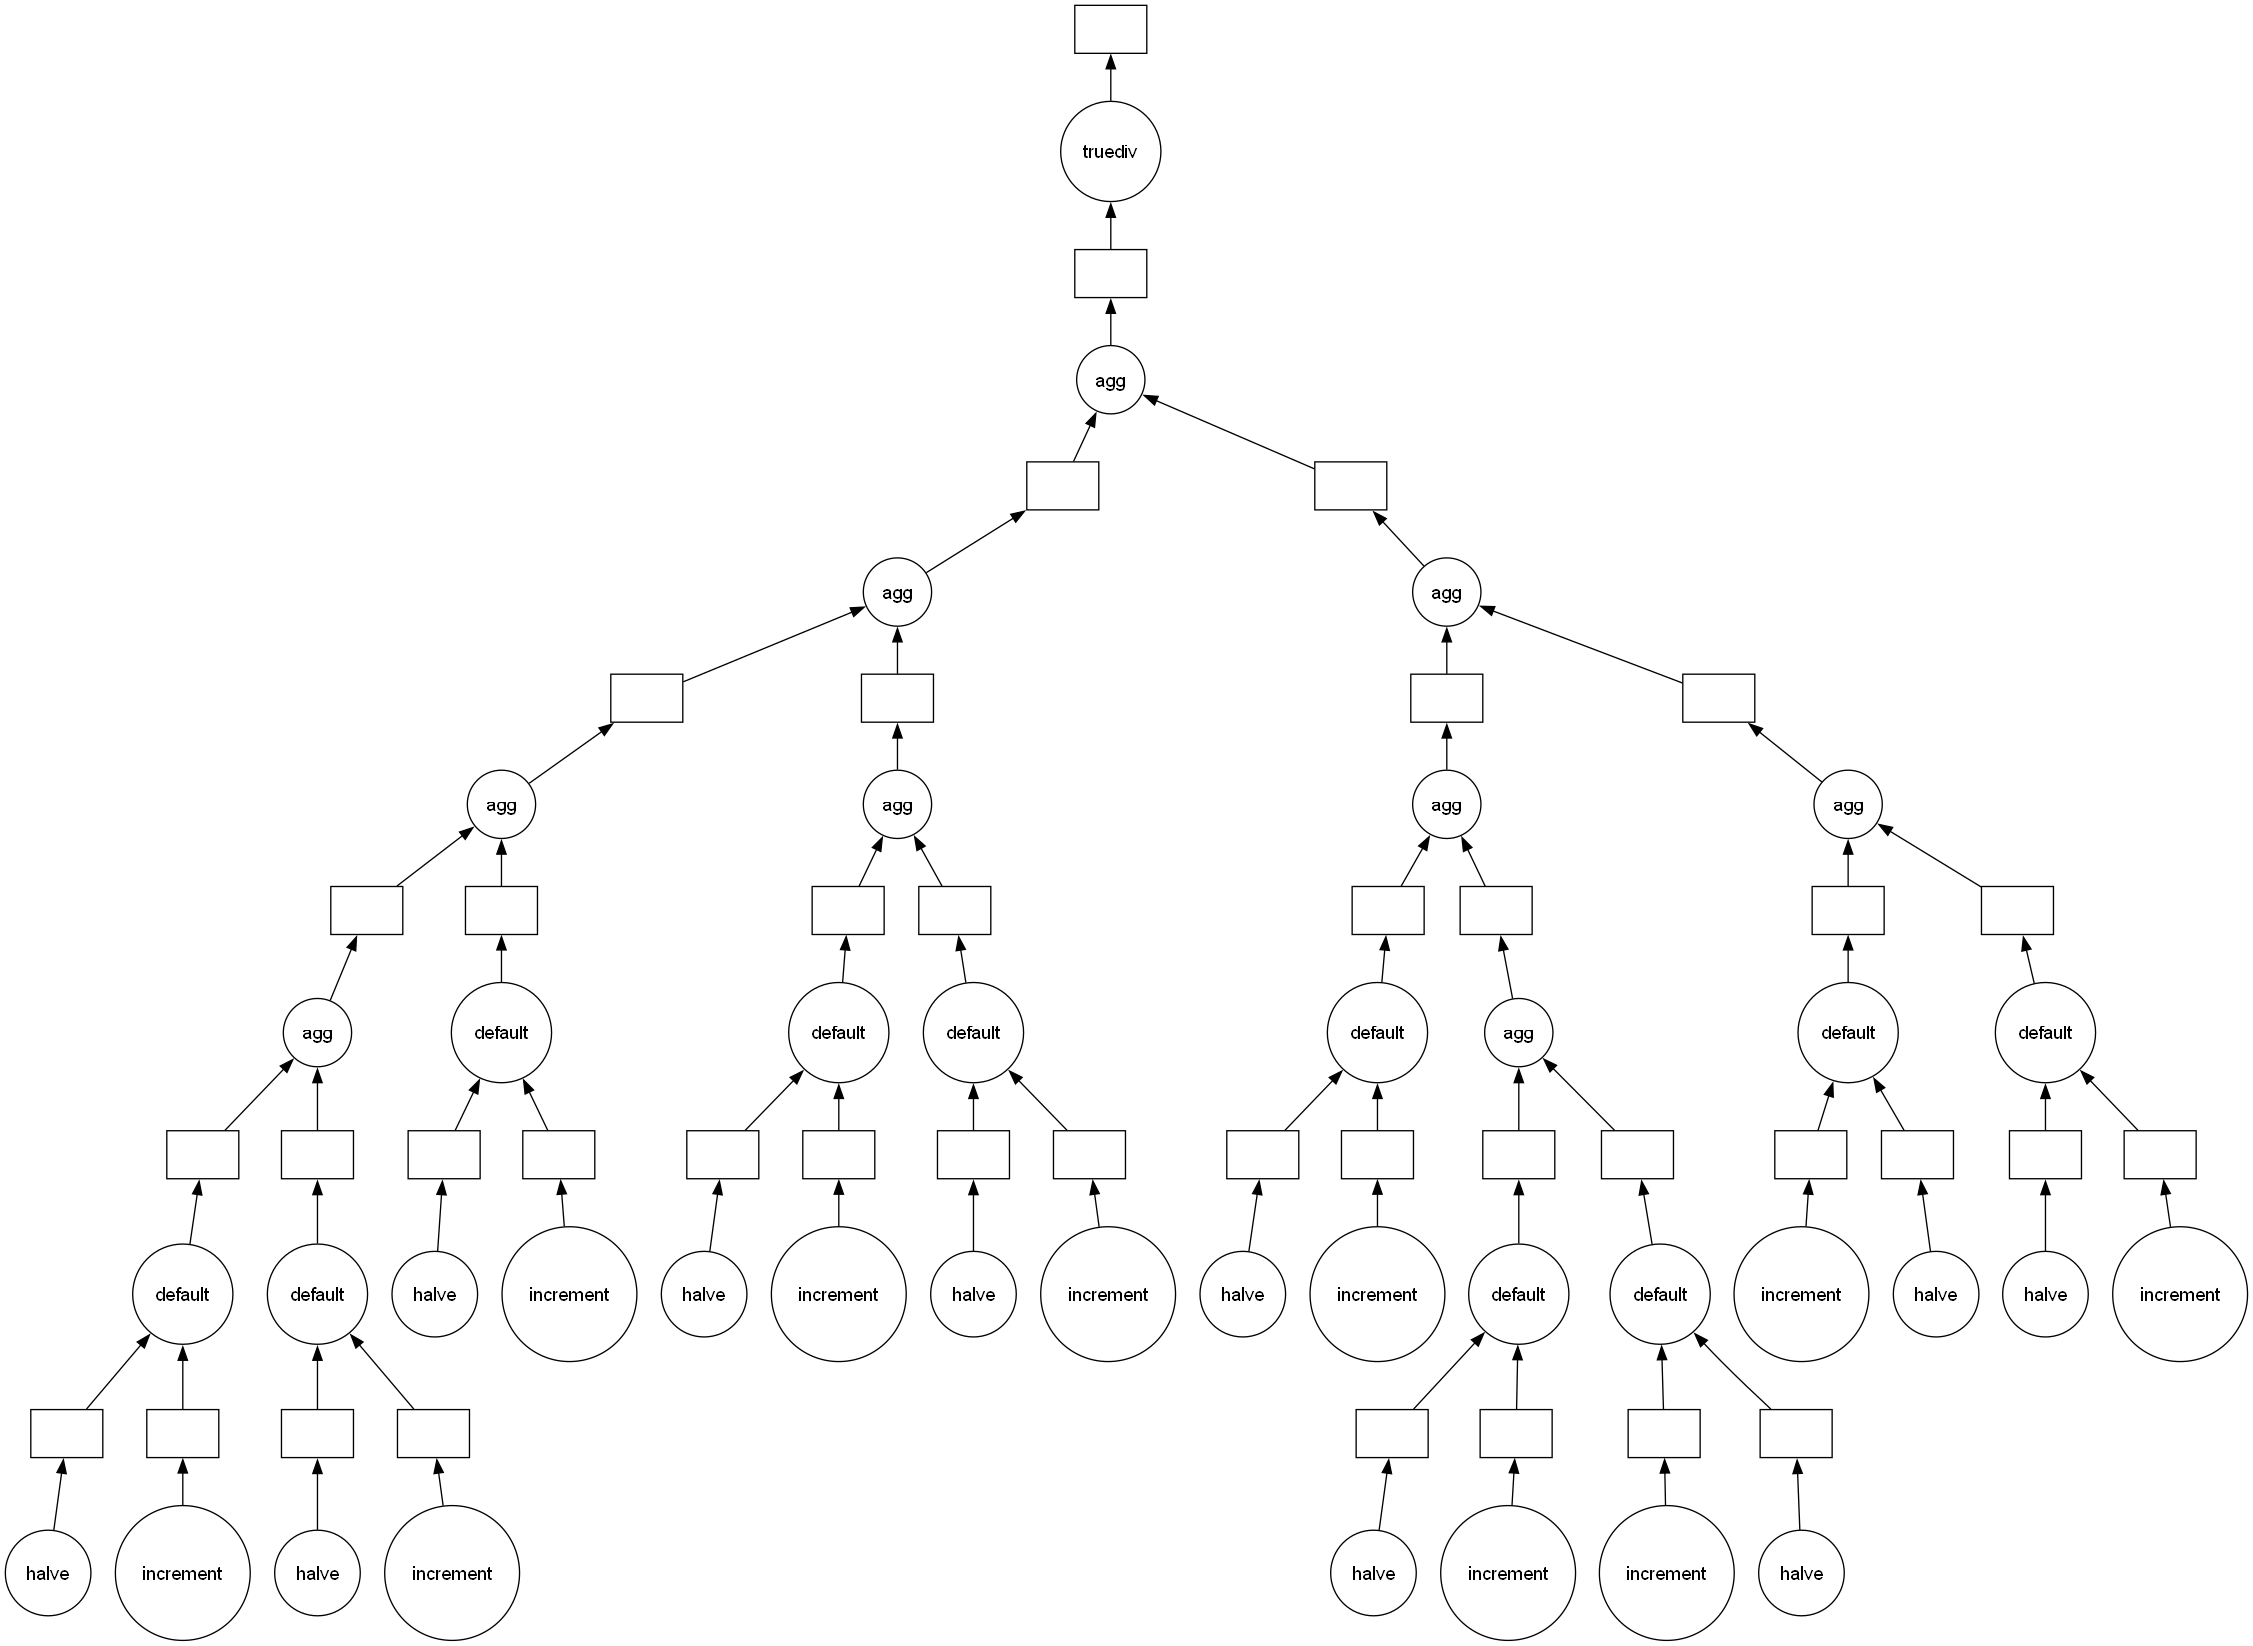

In [14]:
avg_default.visualize()

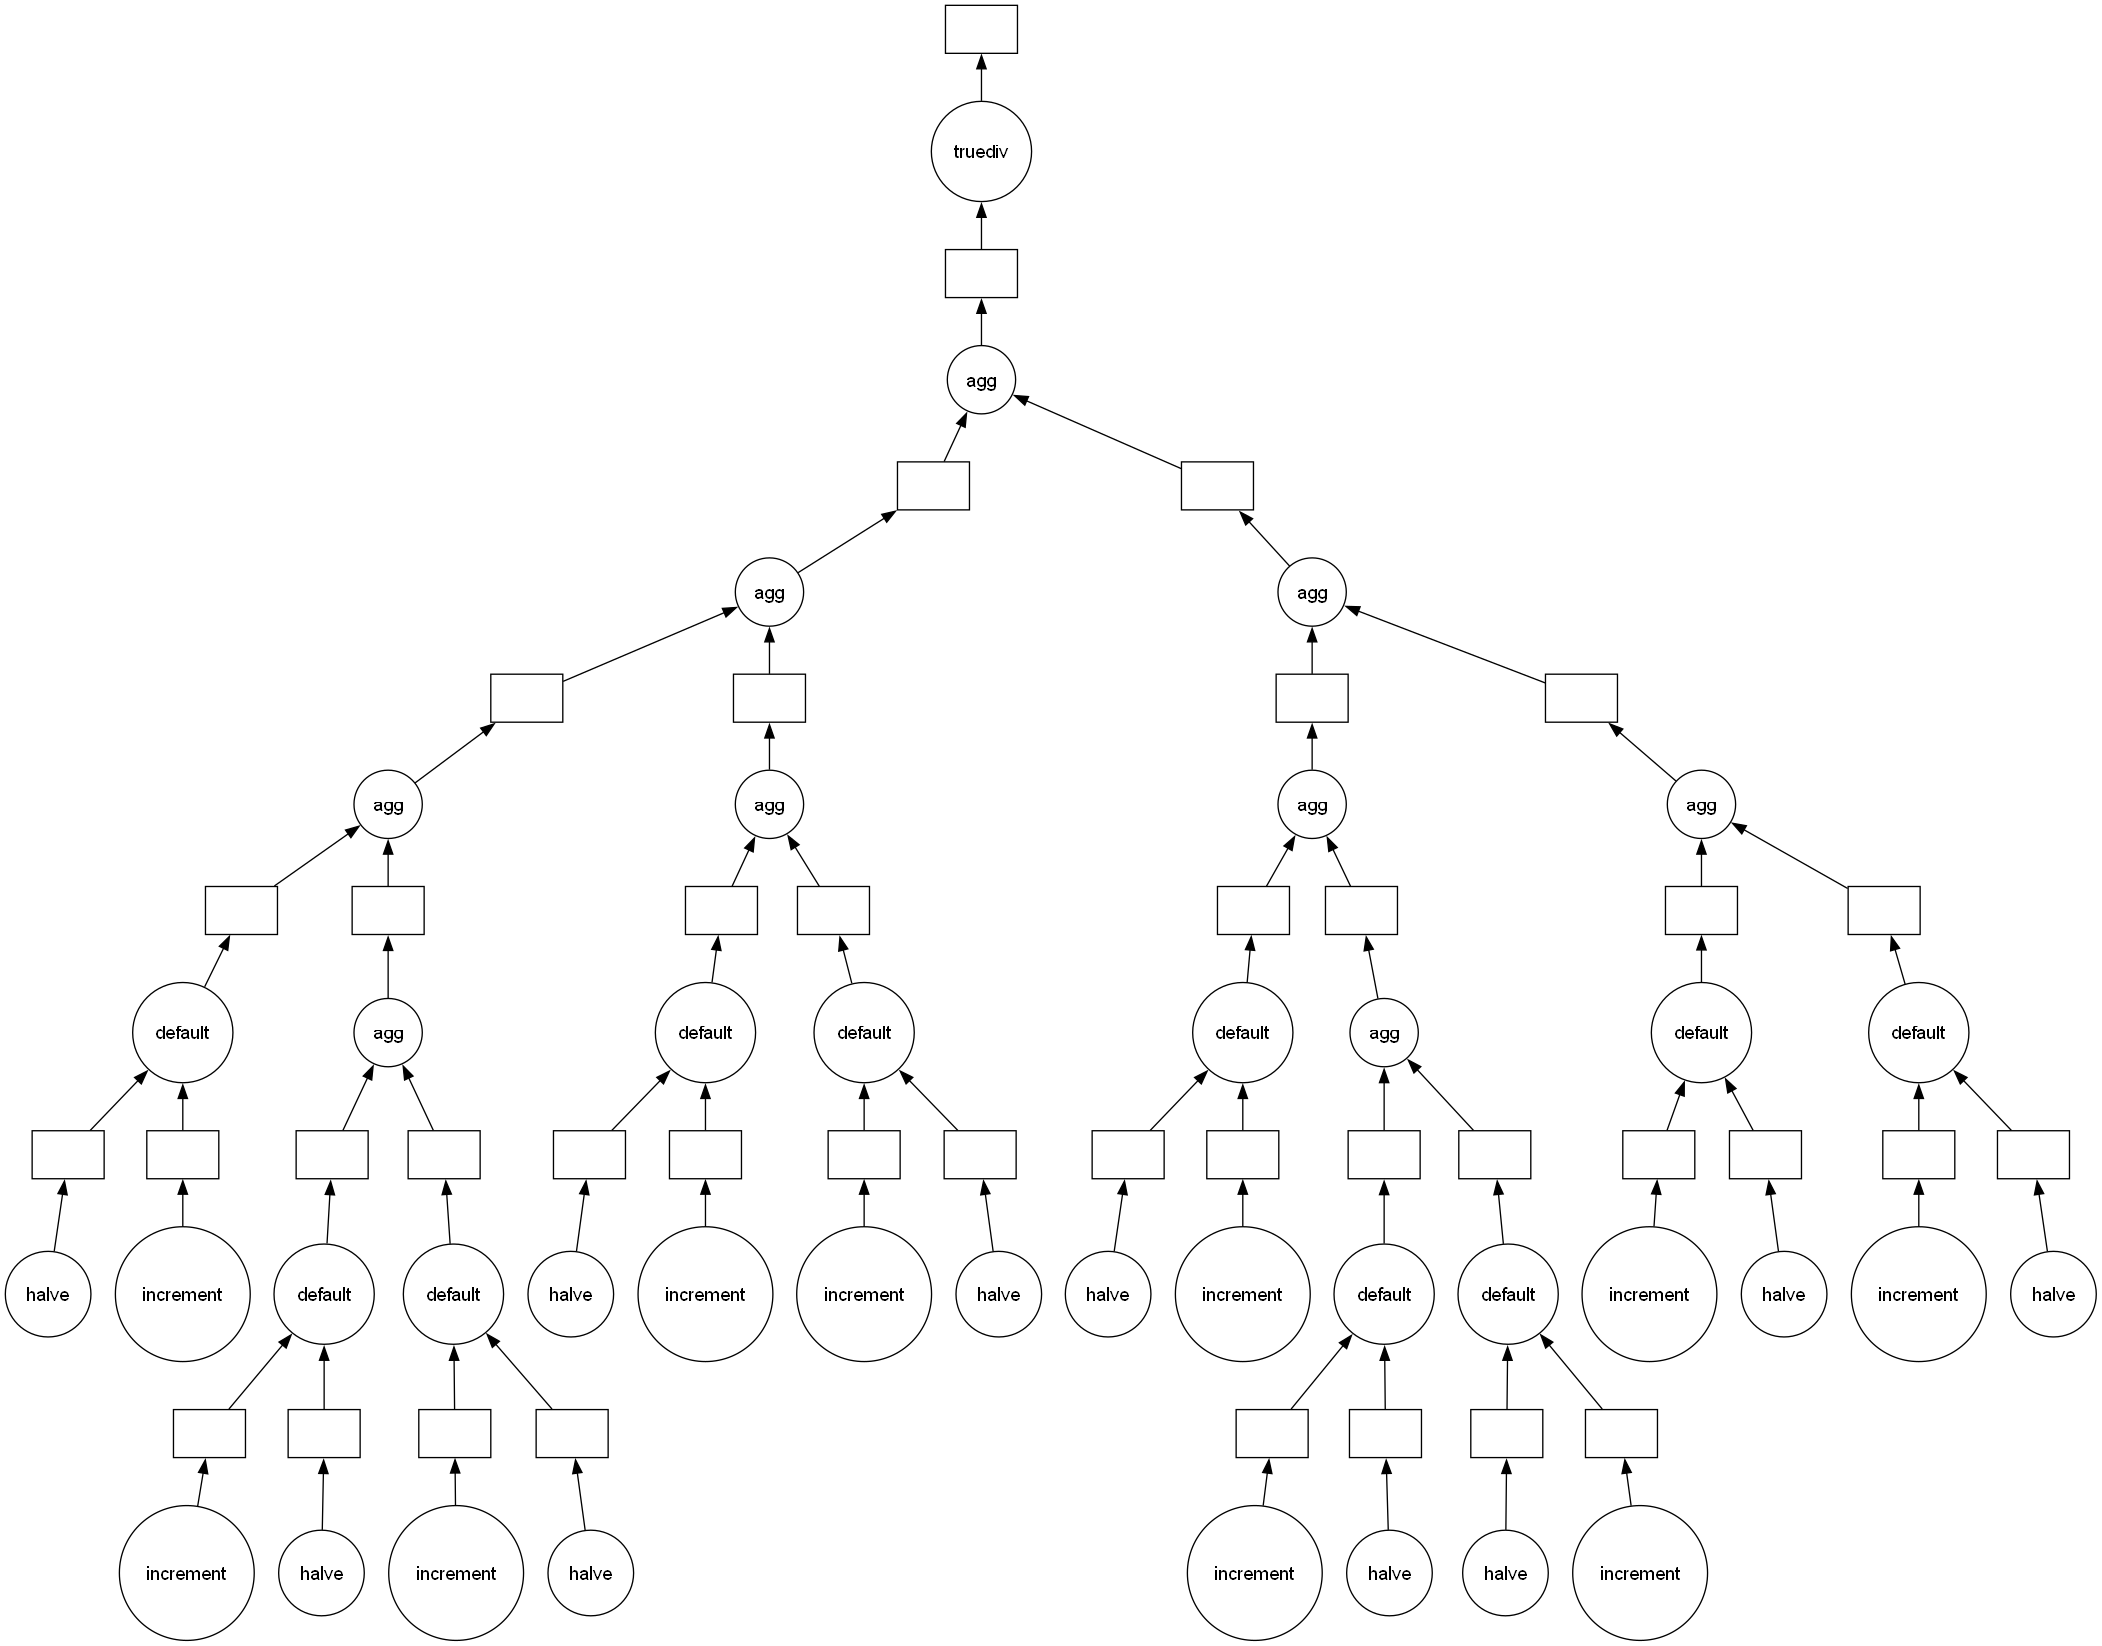

In [15]:
from dask import delayed


@delayed
def increment(x):
    return x + 1


@delayed
def halve(y):
    return y / 2


@delayed
def default(hist, income):
    return hist**2 + income


@delayed
def agg(x, y):
    return x + y


def merge(seq):
    if len(seq) < 2:
        return seq
    middle = len(seq)//2
    left = merge(seq[:middle])
    right = merge(seq[middle:])
    if not right:
        return left
    return [agg(left[0], right[0])]


hist_yrs = range(10)
incomes = range(10)
inc_hist = [increment(n) for n in hist_yrs]
halved_income = [halve(n) for n in incomes]
estimated_defaults = [default(hist, income) for hist, income in zip(inc_hist, halved_income)]
default_sum = merge(estimated_defaults)
avg_default = default_sum[0] / 10
avg_default.compute()
avg_default.visualize()  # requires graphviz and python-graphviz to be installed

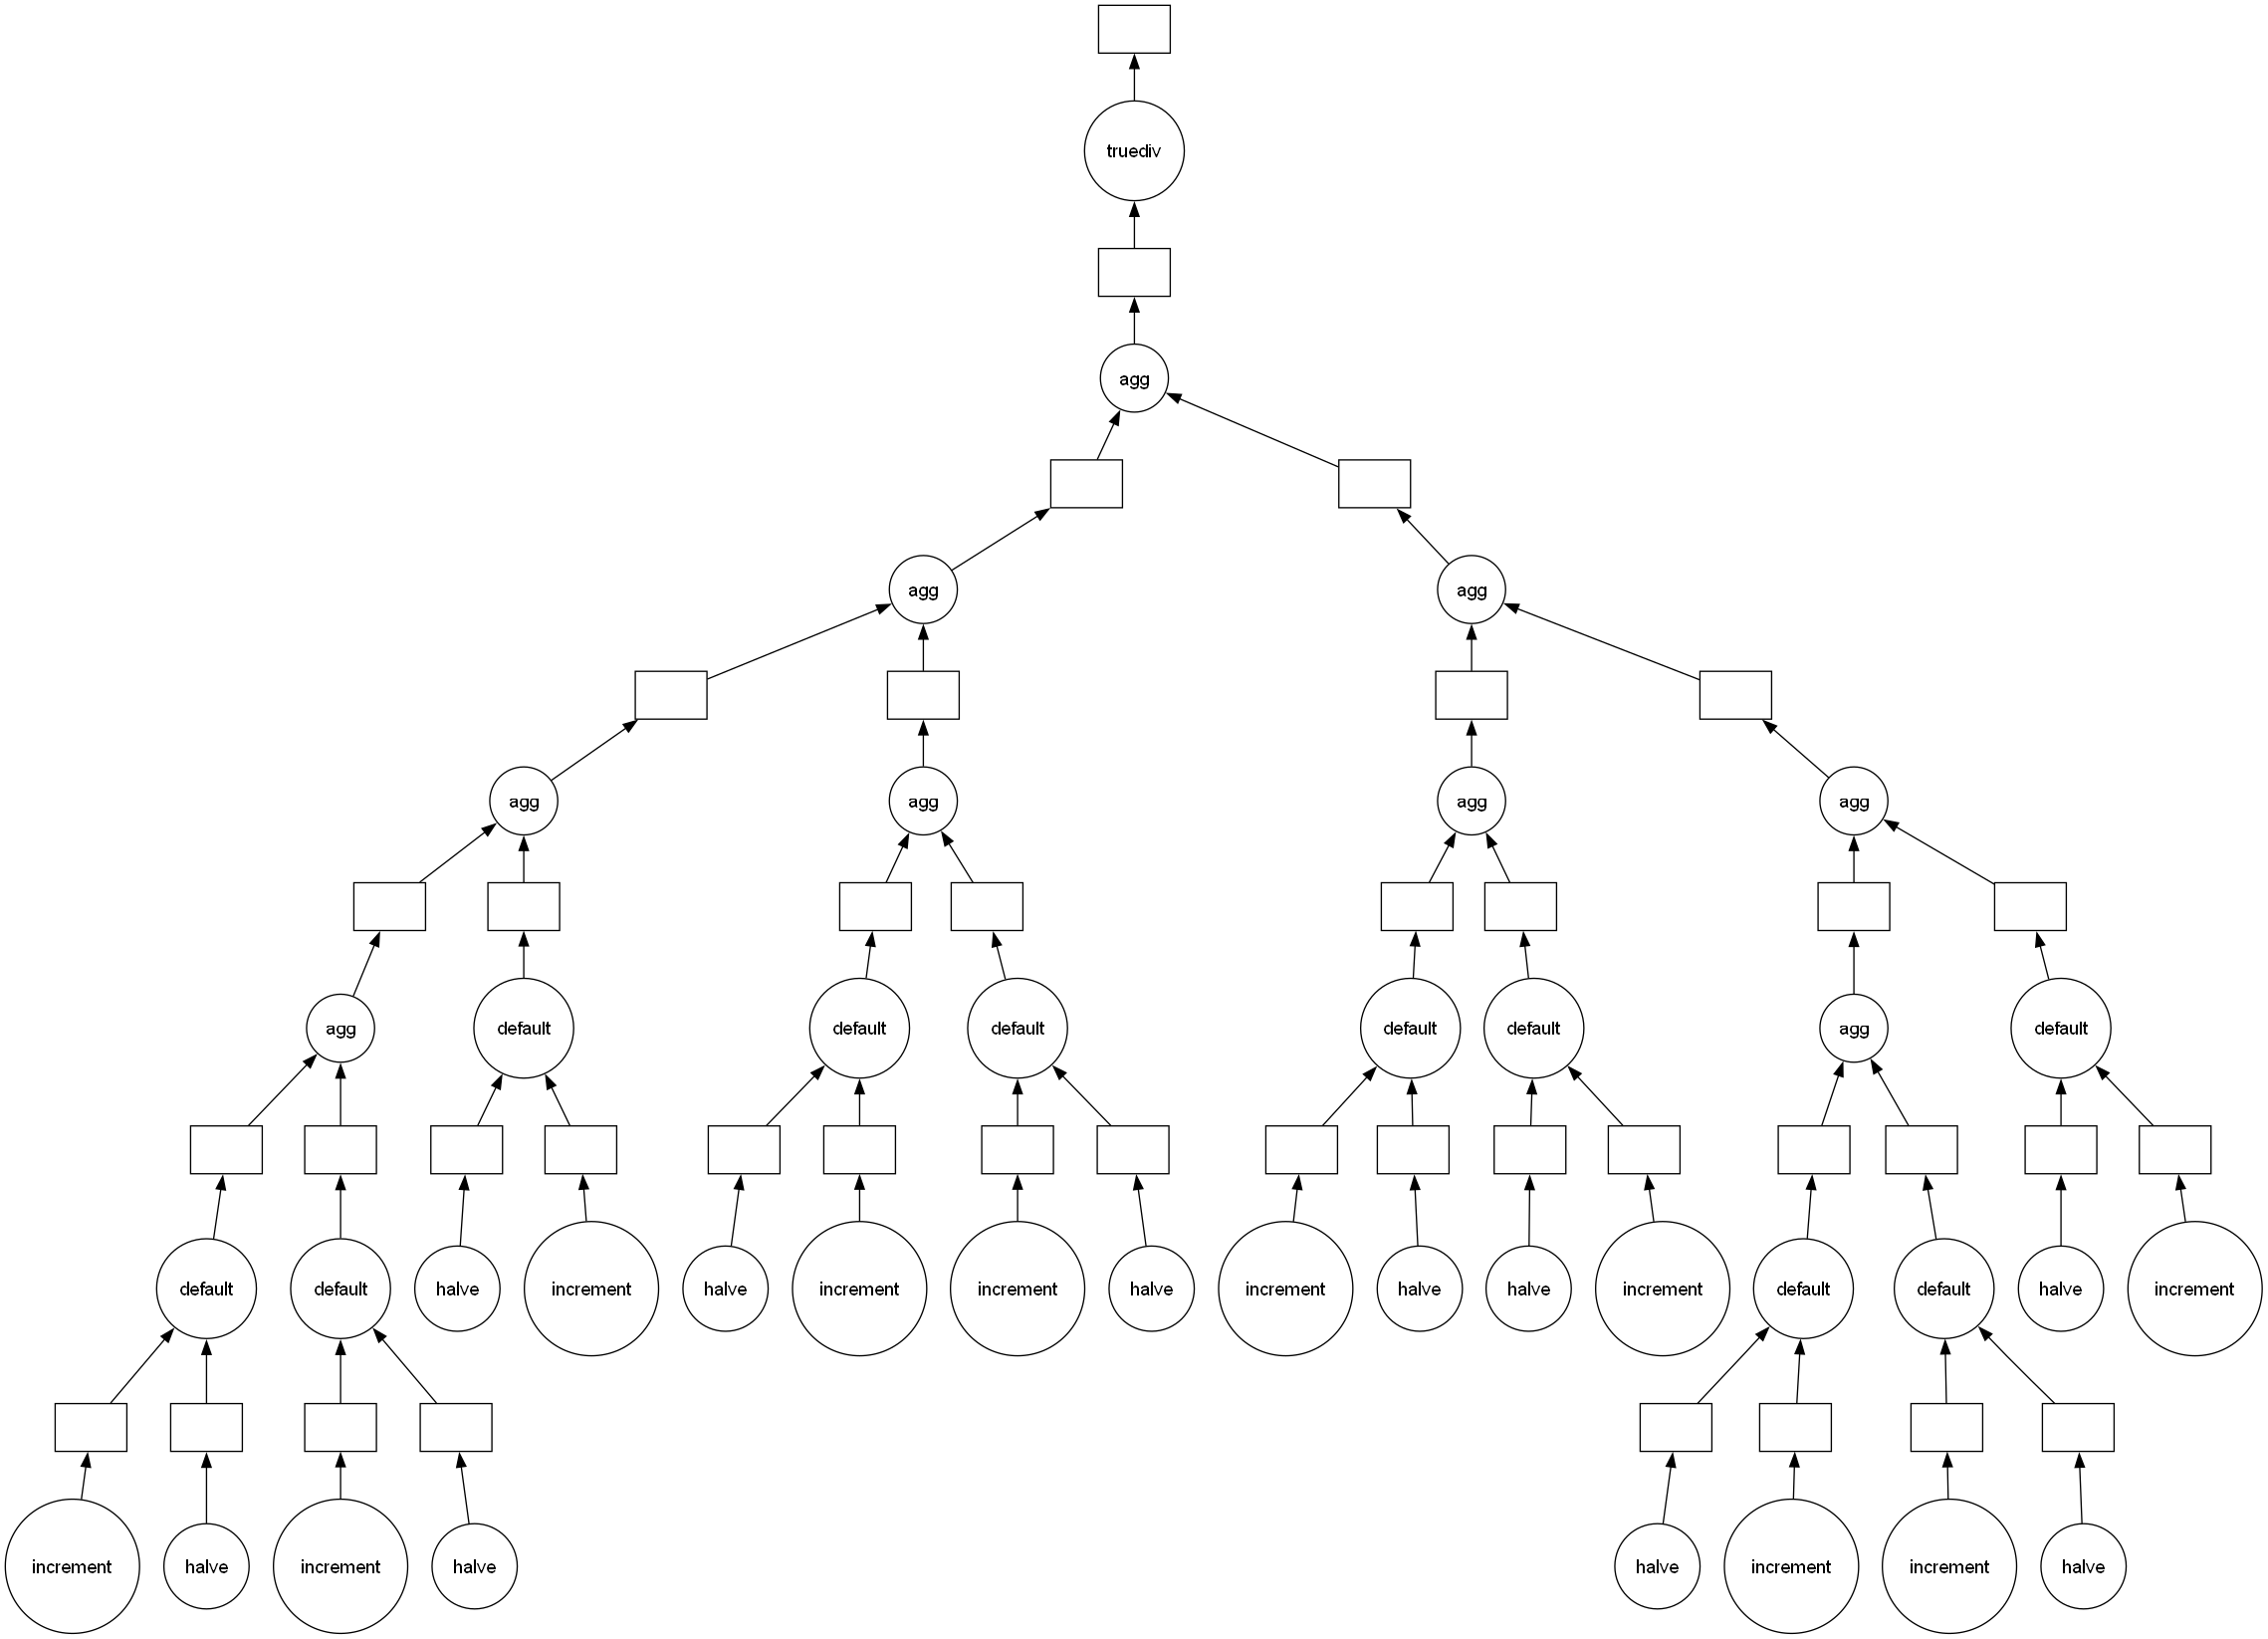

In [18]:
from dask import delayed


@delayed
def increment(x):
    return x + 1


@delayed
def halve(y):
    return y / 2


@delayed
def default(hist, income):
    return hist**2 + income


@delayed
def agg(x, y):
    return x + y


def merge(seq):
    if len(seq) < 2:
        return seq
    middle = len(seq)//2
    left = merge(seq[:middle])
    right = merge(seq[middle:])
    if not right:
        return left
    return [agg(left[0], right[0])]


hist_yrs = range(10)
incomes = range(10)
inc_hist = [increment(n) for n in hist_yrs]
halved_income = [halve(n) for n in incomes]
estimated_defaults = [default(hist, income) for hist, income in zip(inc_hist, halved_income)]
default_sum = merge(estimated_defaults)
avg_default = default_sum[0] / 10
avg_default.compute()
avg_default.visualize()  # requires graphviz and python-graphviz to be installed

In [17]:
default_sum

Delayed('merge-e52ec8a2-bbe3-4ce6-8779-f0a299a1d043')

In [23]:
import dask
ds = dask.compute(default_sum)

In [26]:
ds[0][0]

407.5

In [27]:
ds[0]/10

TypeError: unsupported operand type(s) for /: 'list' and 'int'